<a href="https://colab.research.google.com/github/mar-ale-fer/dio-ml-bootcamp/blob/main/maralefer_yolov5_coco128_mate_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-397-gde62f93c Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.1/112.6 GB disk)


In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
# First time to get the data structure and download coco128
!python train.py --img 640 --batch 16 --epochs 1 --data coco128.yaml --weights yolov5s.pt --cache

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Copy my dataset from drive to YOLO folder structure
!cp /content/drive/MyDrive/00.ML_2025/mate_v2_1_ds.zip /content/datasets/mate_v2_1_ds.zip

In [ ]:
# unzip my dataset
!unzip /content/datasets/mate_v2_1_ds.zip -d /content/datasets/mate

In [6]:
# make a copy of coco128.yaml to have a custom file, to add my path
# for my dataset to the coco dataset
!cp /content/yolov5/data/coco128.yaml /content/yolov5/data/coco128_custom.yaml

I made a manual change to support both, coco and my new dataset:

```
mames:
...
...

  73: book
  74: clock
  75: vase
  76: scissors
  77: teddy bear
  78: hair drier
  79: toothbrush
  80: mate  # My custom class



```



In [7]:
# Now, because my dataset contains only one class 0 (zero)
# to avoid conflicts with current 0 class in coco dataset
# I will change from 0 to 80 in each annotation file
# before (0): 0 0.6152083333333334 0.533109375 0.327 0.33610937500000004
# after (80): 80 0.6152083333333334 0.533109375 0.327 0.33610937500000004
import os

# Set the directory where your label files are located
labels_dir = '/content/datasets/mate/mate_v2_1_ds/labels/train'  # Adjust to your labels folder

# Loop over each label file in the directory
for filename in os.listdir(labels_dir):
    if filename.endswith('.txt'):  # Check if it's a label file
        file_path = os.path.join(labels_dir, filename)

        with open(file_path, 'r') as file:
            lines = file.readlines()

        # Modify class ID from 0 (mate) to 80
        with open(file_path, 'w') as file:
            for line in lines:
                parts = line.split()
                if parts[0] == '0':  # If class ID is 0 (mate)
                    parts[0] = '80'  # Change it to 80 (mate class)
                file.write(' '.join(parts) + '\n')

print("Annotation class IDs updated!")


Annotation class IDs updated!


In [8]:
# I will merge my mate images and anotations inside coco128
import shutil
import os

# Define paths
coco_images = '/content/datasets/coco128/images/train2017'
coco_labels = '/content/datasets/coco128/labels/train2017'

mate_images = '/content/datasets/mate/mate_v2_1_ds/images/train'
mate_labels = '/content/datasets/mate/mate_v2_1_ds/labels/train'

# Create directories if they don't exist
os.makedirs(coco_images, exist_ok=True)
os.makedirs(coco_labels, exist_ok=True)

# Copy images
for file_name in os.listdir(mate_images):
    source_file = os.path.join(mate_images, file_name)
    destination_file = os.path.join(coco_images, file_name)
    shutil.copy(source_file, destination_file)
    print(f"Copied {source_file} to {destination_file}")

# Copy labels
for file_name in os.listdir(mate_labels):
    source_file = os.path.join(mate_labels, file_name)
    destination_file = os.path.join(coco_labels, file_name)
    shutil.copy(source_file, destination_file)
    print(f"Copied {source_file} to {destination_file}")

print("Files copied successfully!")


Copied /content/datasets/mate/mate_v2_1_ds/images/train/pexels-guillermo-berlin-1524368912-30283737_jpg.rf.09d695cb2789f19bbf38fd416c358259.jpg to /content/datasets/coco128/images/train2017/pexels-guillermo-berlin-1524368912-30283737_jpg.rf.09d695cb2789f19bbf38fd416c358259.jpg
Copied /content/datasets/mate/mate_v2_1_ds/images/train/IMG_20240901_165548279_HDR_jpg.rf.cc7ca6a2fe0a67ae743c9216c313e267.jpg to /content/datasets/coco128/images/train2017/IMG_20240901_165548279_HDR_jpg.rf.cc7ca6a2fe0a67ae743c9216c313e267.jpg
Copied /content/datasets/mate/mate_v2_1_ds/images/train/IMG_20231228_162141210_HDR_jpg.rf.ca2310e51bd57d8d0565e58f540e41bb.jpg to /content/datasets/coco128/images/train2017/IMG_20231228_162141210_HDR_jpg.rf.ca2310e51bd57d8d0565e58f540e41bb.jpg
Copied /content/datasets/mate/mate_v2_1_ds/images/train/IMG_20240519_150352492_HDR_jpg.rf.d535ccd75fbb33f5e97a3d6102444d5d.jpg to /content/datasets/coco128/images/train2017/IMG_20240519_150352492_HDR_jpg.rf.d535ccd75fbb33f5e97a3d61024

In [10]:
# Train YOLOv5s on COCO128 for 3 epochs
# Second time, the actual processing, coco128 + mate
!python train.py --img 640 --batch 16 --epochs 30 --data coco128_custom.yaml --weights yolov5s.pt --cache

2025-01-19 17:03:42.371592: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-19 17:03:42.393822: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-19 17:03:42.399980: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=coco128_custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=Fal

In [11]:
# use the last runs/train/exp[] folder, which contains the weights after training
!python detect.py --weights runs/train/exp3/weights/last.pt --conf 0.1 --source /content/datasets/mate/mate_v2_1_ds/images/test

detect: weights=['runs/train/exp3/weights/last.pt'], source=/content/datasets/mate/mate_v2_1_ds/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7228582 parameters, 0 gradients, 16.4 GFLOPs
image 1/8 /content/datasets/mate/mate_v2_1_ds/images/test/IMG_20200506_201108_jpg.rf.8fbc3963ebbf53c5a7d4e0218e56b101.jpg: 640x480 1 mate, 34.4ms
image 2/8 /content/datasets/mate/mate_v2_1_ds/images/test/IMG_20200506_201119_jpg.rf.bef0893c68ddb8d47e33dd3b3bb3dfc0.jpg: 640x480 1 mate, 9

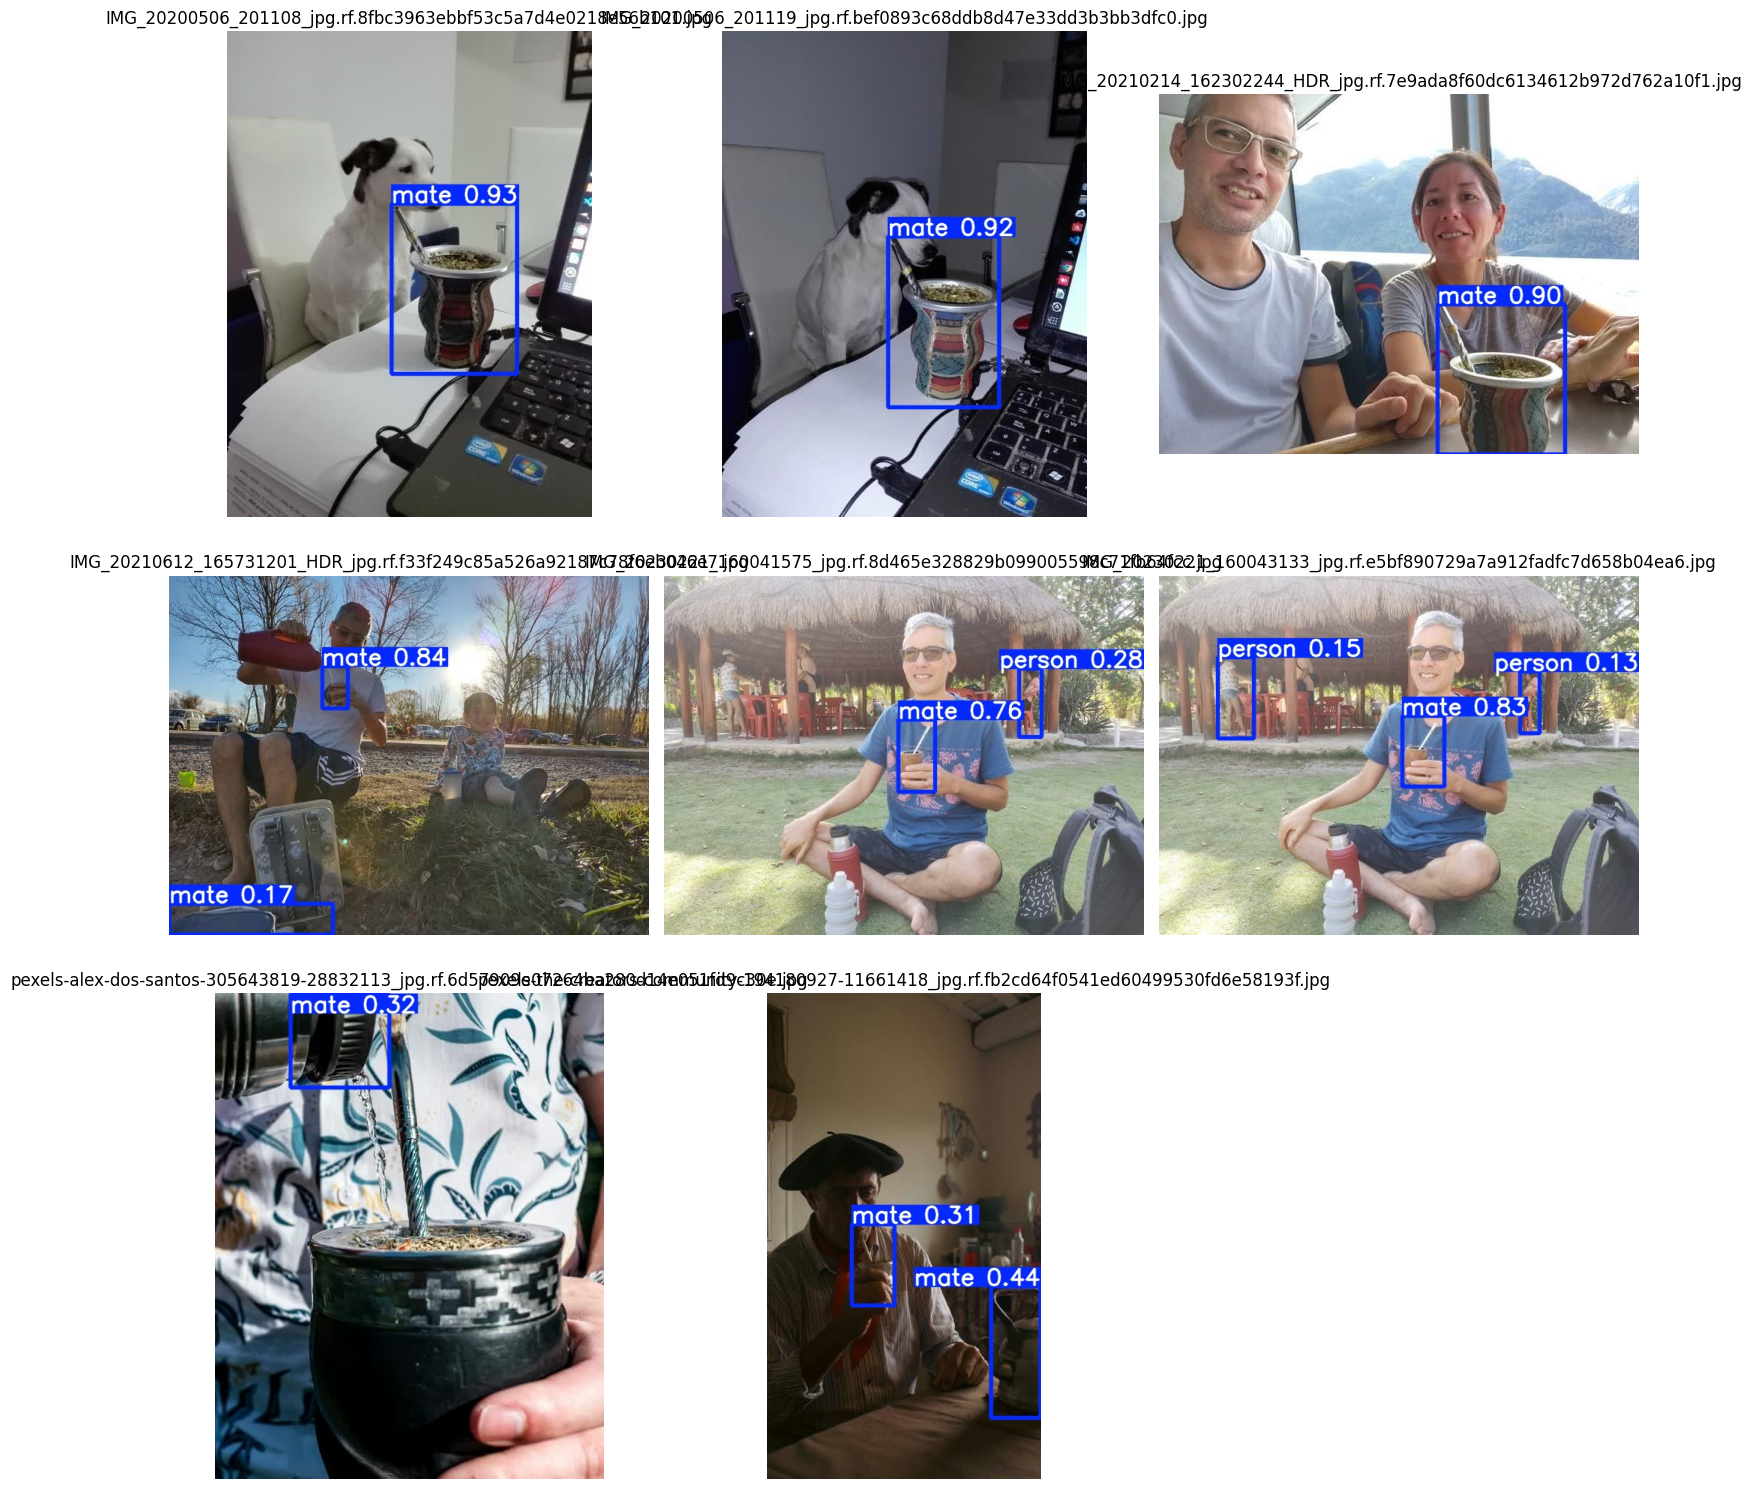

In [13]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder containing detection images
output_folder = '/content/yolov5/runs/detect/exp'

# Get a list of all image files in the folder
image_files = [os.path.join(output_folder, f) for f in os.listdir(output_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Sort files for consistent ordering (optional)
image_files.sort()

# Display the images in a grid
def display_images(images, cols=3):
    rows = (len(images) + cols - 1) // cols
    fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axs = axs.flatten()
    for img, ax in zip(images, axs):
        image = Image.open(img)
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(os.path.basename(img))
    for ax in axs[len(images):]:  # Hide unused subplots
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Show the images
display_images(image_files, cols=3)
